## Week 7 Medium - 資料視覺化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms


import tejapi
tejapi.ApiConfig.api_key = "your key"
info = tejapi.ApiConfig.info()

## 1. 資料撈取(TEJAPI)

In [2]:
TSMC = tejapi.get(
    'TWN/EWPRCD', 
    coid = '2330',
    mdate={'gte':'2020-06-01', 'lte':'2021-04-12'}, 
    opts={'columns': ['mdate','open_d','high_d','low_d','close_d', 'volume']}, 
    paginate=True
    )

UMC = tejapi.get(
    'TWN/EWPRCD', 
    coid = '2303',
    mdate={'gte':'2020-06-01', 'lte':'2021-04-12'},
    opts={'columns': ['mdate','open_d','high_d','low_d','close_d', 'volume']}, 
    paginate=True
    )

UMC = UMC.set_index('mdate')
TSMC = TSMC.set_index('mdate')

## 2. 基本作圖（單軸、雙軸、散點、長條、箱型等等） 

In [3]:
TSMC['5_MA'] = TSMC['close_d'].rolling(5).mean()

### 2-1. 單軸（股價 VS 5日均）

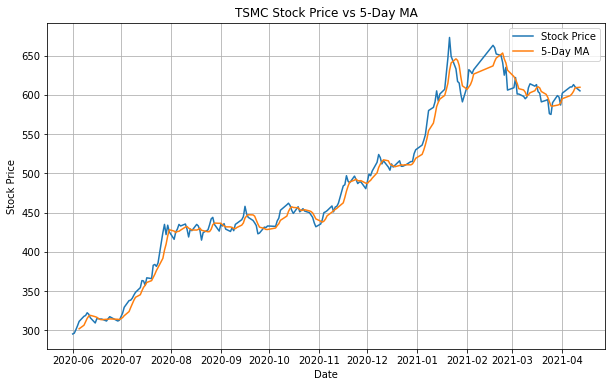

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(TSMC['close_d'], lw=1.5, label = 'Stock Price')
plt.plot(TSMC['5_MA'], lw=1.5, label = '5-Day MA')
plt.legend(loc = 0)                                        #label放哪
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TSMC Stock Price vs 5-Day MA')
plt.grid()
plt.show()

### 2-2. 雙軸（股價 VS 股價）

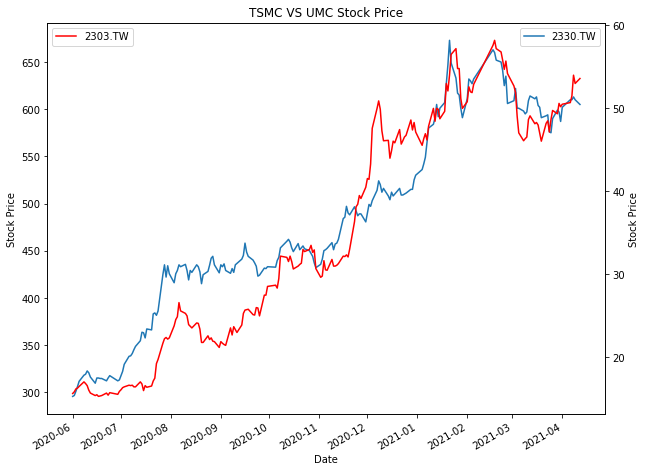

In [5]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.plot(TSMC['close_d'], lw=1.5, label = '2330.TW')                                       
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TSMC VS UMC Stock Price')
plt.legend(loc=1) 


ax2 = ax1.twinx()
plt.plot(UMC['close_d'], lw=1.5, color = "r",label = '2303.TW')                       
plt.ylabel('Stock Price')
plt.legend(loc=2) 

plt.gcf().autofmt_xdate()
plt.show()

### 2-3. 散點、直方、箱型

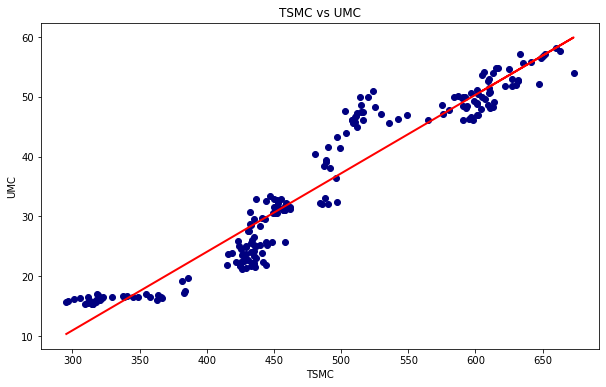

In [6]:
## scatter plot
from sklearn.linear_model import LinearRegression

plt.figure(figsize = (10, 6))
plt.scatter(TSMC['close_d'], UMC['close_d'], color = 'navy')

##回歸線繪製
reg = LinearRegression().fit(np.array(TSMC['close_d'].tolist()).reshape(-1,1),  UMC['close_d'])
pred = reg.predict(np.array(TSMC['close_d'].tolist()).reshape(-1,1))
plt.plot(TSMC['close_d'], pred, linewidth = 2, color = 'r',label = '迴歸線')

plt.xlabel('TSMC')
plt.ylabel('UMC')
plt.title('TSMC vs UMC')

plt.show()

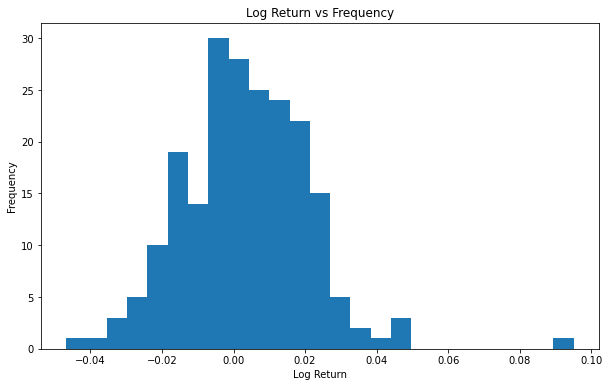

In [7]:
## histogram
ret_tsmc = np.log(TSMC['close_d']/TSMC['close_d'].shift(1)).tolist()

plt.figure(figsize = (10, 6))
plt.hist(ret_tsmc, bins = 25)

plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Log Return vs Frequency')

plt.show()

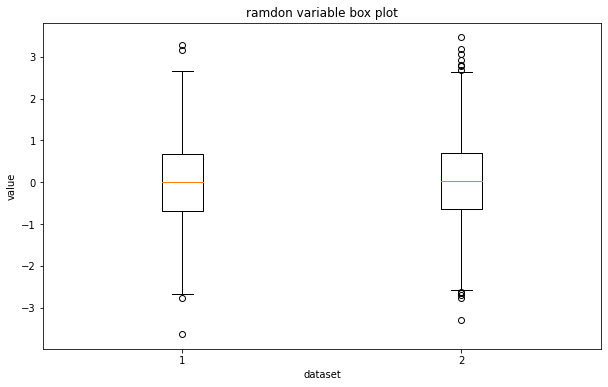

In [8]:
##box plot
rv = np.random.standard_normal((1000,2))

plt.figure(figsize = (10, 6))
plt.boxplot(rv)

plt.xlabel('dataset')
plt.ylabel('value')
plt.title('ramdon variable box plot')

plt.show()

## 3. 金融時間序列資料

In [9]:
tickers = ['2330', '1301', '2317', '2454' , '2882']

In [10]:
df  =  tejapi.get(
        'TWN/EWPRCD', 
        coid = tickers,
        mdate={'gte':'2020-06-01', 'lte':'2021-04-12'}, 
        opts={'columns': ['mdate', 'coid','close_d']}, 
        paginate=True
        )

In [11]:
df = df.sort_values(['coid', 'mdate']).set_index('mdate')
df 

,coid,close_d
mdate,,
2020-06-01 00:00:00+00:00,1301,83.80
2020-06-02 00:00:00+00:00,1301,84.30
2020-06-03 00:00:00+00:00,1301,86.10
2020-06-04 00:00:00+00:00,1301,86.80
2020-06-05 00:00:00+00:00,1301,87.60
...,...,...
2021-04-06 00:00:00+00:00,2882,48.00
2021-04-07 00:00:00+00:00,2882,48.00
2021-04-08 00:00:00+00:00,2882,47.65


In [12]:
data = df.pivot_table(index = df.index, columns = 'coid', values = 'close_d')

In [13]:
data

coid,1301,2317,2330,2454,2882
mdate,,,,,
2020-06-01 00:00:00+00:00,83.8,76.2,295.5,461.5,40.25
2020-06-02 00:00:00+00:00,84.3,77.1,296.5,485.0,40.35
2020-06-03 00:00:00+00:00,86.1,78.1,301.0,490.0,41.40
2020-06-04 00:00:00+00:00,86.8,78.4,306.0,490.0,41.55
2020-06-05 00:00:00+00:00,87.6,78.5,311.5,494.0,41.60
...,...,...,...,...,...
2021-04-06 00:00:00+00:00,101.0,122.5,610.0,995.0,48.00
2021-04-07 00:00:00+00:00,100.5,123.5,610.0,998.0,48.00
2021-04-08 00:00:00+00:00,100.5,122.5,613.0,1020.0,47.65


### 3-1. Pandas 內建敘述統計方法

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-06-01 00:00:00+00:00 to 2021-04-12 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1301    210 non-null    float64
 1   2317    210 non-null    float64
 2   2330    210 non-null    float64
 3   2454    210 non-null    float64
 4   2882    210 non-null    float64
dtypes: float64(5)
memory usage: 9.8 KB


In [15]:
data.describe()

coid,1301,2317,2330,2454,2882
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,87.509048,91.679048,479.290476,720.176190,41.232619
std,7.882138,17.088311,99.434304,137.316262,2.288539
min,77.300000,74.300000,295.500000,461.500000,38.000000
25%,80.225000,78.425000,427.625000,609.250000,39.862500
50%,86.950000,82.900000,454.000000,696.500000,40.700000
75%,92.750000,109.500000,586.250000,850.750000,41.900000
max,105.000000,130.500000,673.000000,1020.000000,48.800000


### 3-2. Pandas 內建作圖

#### 平均報酬率

<AxesSubplot:xlabel='coid'>

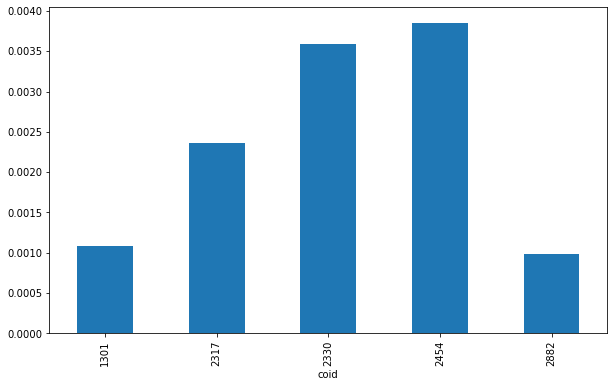

In [16]:
data.pct_change().mean().plot(kind = 'bar', figsize=(10,6))

#### 累積報酬率

In [17]:
ret = np.log(data/data.shift(1))
ret.head().round(3)

coid,1301,2317,2330,2454,2882
mdate,,,,,
2020-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-06-02 00:00:00+00:00,0.006,0.012,0.003,0.050,0.002
2020-06-03 00:00:00+00:00,0.021,0.013,0.015,0.010,0.026
2020-06-04 00:00:00+00:00,0.008,0.004,0.016,0.000,0.004
2020-06-05 00:00:00+00:00,0.009,0.001,0.018,0.008,0.001


<AxesSubplot:xlabel='mdate'>

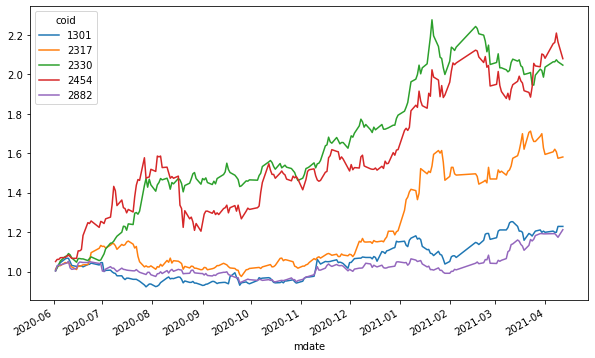

In [18]:
ret.cumsum().apply(np.exp).plot(figsize = (10,6))

#### 最高值/最低值/平均值

In [19]:
windows = 20
data['min'] = data['2330'].rolling(windows).min()
data['mean'] = data['2330'].rolling(windows).mean()
data['max'] = data['2330'].rolling(windows).max()

<AxesSubplot:xlabel='mdate'>

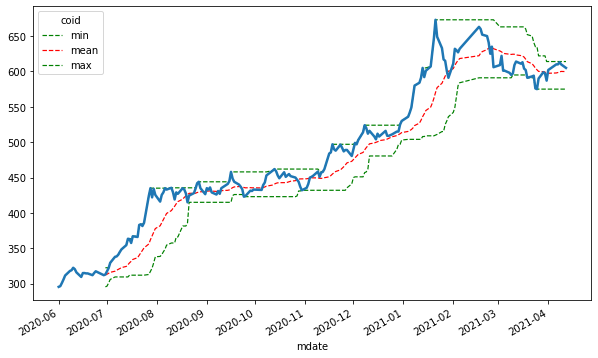

In [20]:
ax = data[['min', 'mean', 'max']].plot(figsize = (10, 6), style=['g--', 'r--', 'g--'], lw=1.2)
data['2330'].plot(ax=ax, lw=2.5)

#### 技術分析-長短天期移動平均線

In [21]:
data['SMA_5'] = data['2330'].rolling(window = 5).mean()
data['SMA_20'] = data['2330'].rolling(window = 20).mean()

<AxesSubplot:xlabel='mdate'>

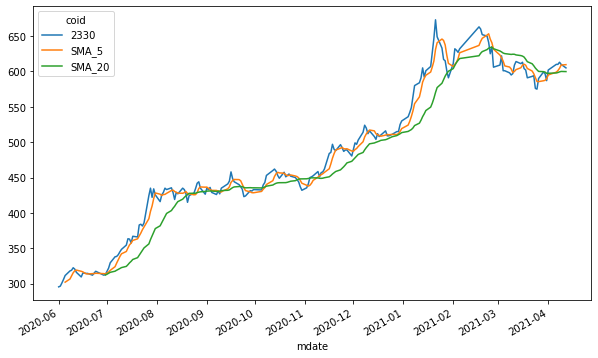

In [22]:
data[['2330', 'SMA_5', 'SMA_20']].plot(figsize = (10,6))

#### 黃金交叉買入/死亡交叉賣出

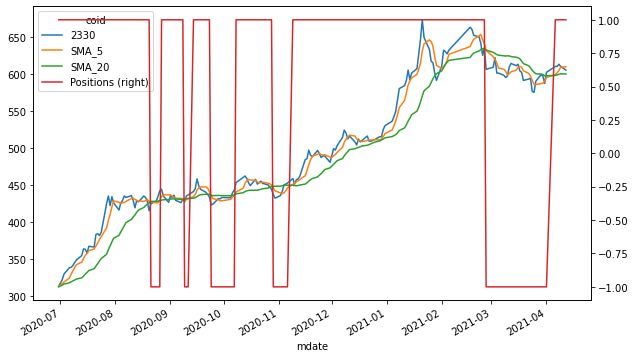

In [23]:
data.dropna(inplace = True)
data['Positions'] = np.where(data['SMA_5'] > data['SMA_20'], 1, -1)

ax = data[['2330', 'SMA_5', 'SMA_20', 'Positions']].plot(figsize = (10, 6), secondary_y = 'Positions')